In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Cargar archivos

df_player_data = pd.read_csv('res/player_data.csv')
df_players = pd.read_csv('res/players.csv')
df_season_stats = pd.read_csv('res/Seasons_Stats.csv')

In [3]:
df_players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [4]:
df_season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [5]:
df_player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [6]:
df_players.shape

(3922, 8)

In [7]:
df_season_stats.shape

(24691, 53)

In [8]:
df_player_data.shape

(4550, 8)

In [9]:
# Renombrar la columna name por Player.

df_data = df_player_data.rename(columns = {'name':'Player'})
df_data

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [10]:
# Unión de los tres Dataframe por Player.

df_ply_data = pd.merge(df_players, df_data, on= 'Player')
df_info_all = pd.merge(df_ply_data, df_season_stats, on='Player')
df_info_all.head()

,Unnamed: 0_x,Player,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
3,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
4,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,...,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0


In [11]:
df_info_all.columns

Index(['Unnamed: 0_x', 'Player', 'height_x', 'weight_x', 'collage', 'born',
       'birth_city', 'birth_state', 'year_start', 'year_end', 'position',
       'height_y', 'weight_y', 'birth_date', 'college', 'Unnamed: 0_y', 'Year',
       'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl',
       'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')

In [12]:
df_info_all.shape

(23468, 67)

LIMPIEZA DATA FRAME

In [13]:
# Eliminar los NaN del dataframe

df_clean = df_info_all.fillna(0)

In [14]:
# Eliminando las columnas height_y(pies) y weight_y(libras)

df_clean = df_clean.drop(['height_y','weight_y'], axis=1)

In [15]:
# Eliminando columnas no necesarias para la investigación

df_clean = df_clean.drop(['birth_city','birth_state','collage','born','Unnamed: 0_y','Unnamed: 0_x'], axis=1)

In [16]:
df_clean=df_clean.drop(['college'], axis=1)

In [17]:
# Columnas con las que se trabajará

df_clean.columns

Index(['Player', 'height_x', 'weight_x', 'year_start', 'year_end', 'position',
       'birth_date', 'Year', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [18]:
# DATAFRAME LIMPIO Y LISTO PARA TRABAJAR

df_clean

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1950.0,G-F,31.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1951.0,G-F,32.0,...,0.644,0.0,0.0,89.0,77.0,0.0,0.0,0.0,97.0,202.0
2,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1950.0,SG,29.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
3,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1951.0,SG,30.0,...,0.649,0.0,0.0,100.0,115.0,0.0,0.0,0.0,98.0,152.0
4,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1952.0,SG,31.0,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,Troy Williams,198.0,97.0,2017,2018,F,"December 30, 1994",2017.0,SF,22.0,...,0.857,9.0,15.0,24.0,6.0,3.0,1.0,6.0,18.0,58.0
23464,Kyle Wiltjer,208.0,108.0,2017,2017,F,"October 20, 1992",2017.0,PF,24.0,...,0.500,4.0,6.0,10.0,2.0,3.0,1.0,5.0,4.0,13.0
23465,Stephen Zimmerman,213.0,108.0,2017,2017,C,"September 9, 1996",2017.0,C,20.0,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
23466,Paul Zipser,203.0,97.0,2017,2018,G-F,"February 18, 1994",2017.0,SF,22.0,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [19]:
# Extraer DataFrame limpio a csv

#df_clean.to_csv('data_clean.csv')

In [20]:
porcentaje_3P = df_clean['3P%']
porcentaje_3P

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
23463    0.381
23464    0.308
23465    0.000
23466    0.333
23467    0.000
Name: 3P%, Length: 23468, dtype: float64

In [21]:
año_temportadas = df_clean['Year'].unique()
sorted(año_temportadas)

[1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [22]:
media_3P_año = df_clean.groupby('Year')['3P%'].mean()
media_3P_año

Year
1950.0    0.000000
1951.0    0.000000
1952.0    0.000000
1953.0    0.000000
1954.0    0.000000
            ...   
2013.0    0.234282
2014.0    0.243674
2015.0    0.250627
2016.0    0.267248
2017.0    0.278438
Name: 3P%, Length: 68, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

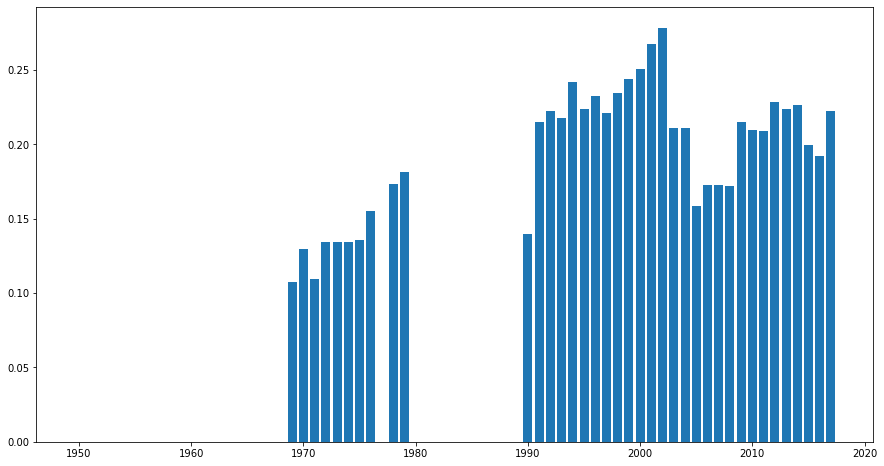

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar ( x = año_temportadas, height = media_3P_año)
plt.show

In [24]:
df_clean.loc[:,['Year','Player', '3P%']].max()

Year                  2017.0
Player    Zydrunas Ilgauskas
3P%                      1.0
dtype: object

In [25]:
year_2003 = df_clean[df_clean['Year']==2003]
porc_3p_2003 = year_2003.loc[:,['Player', '3P%']]
porc_3p_2003.max()

Player    Zydrunas Ilgauskas
3P%                      1.0
dtype: object

In [26]:
df_clean_copy = df_clean.copy()
df_clean_copy.head()

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1950.0,G-F,31.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1951.0,G-F,32.0,...,0.644,0.0,0.0,89.0,77.0,0.0,0.0,0.0,97.0,202.0
2,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1950.0,SG,29.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
3,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1951.0,SG,30.0,...,0.649,0.0,0.0,100.0,115.0,0.0,0.0,0.0,98.0,152.0
4,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1952.0,SG,31.0,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0


In [27]:
df_clean_P = df_clean_copy[df_clean_copy['position'] == 'C']
df_clean_P

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
37,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1950.0,C,27.0,...,0.775,0.0,0.0,0.0,149.0,0.0,0.0,0.0,229.0,779.0
38,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.740,0.0,0.0,220.0,60.0,0.0,0.0,0.0,197.0,326.0
39,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.714,0.0,0.0,135.0,40.0,0.0,0.0,0.0,130.0,201.0
40,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.784,0.0,0.0,85.0,20.0,0.0,0.0,0.0,67.0,125.0
67,Jim Browne,208.0,106.0,1949,1950,C,"January 1, 1930",1950.0,C,20.0,...,0.481,0.0,0.0,0.0,8.0,0.0,0.0,0.0,16.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23450,Edy Tavares,211.0,115.0,2016,2017,C,"March 22, 1992",2017.0,C,24.0,...,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
23451,Edy Tavares,211.0,115.0,2016,2017,C,"March 22, 1992",2017.0,C,24.0,...,0.000,4.0,6.0,10.0,1.0,0.0,6.0,2.0,3.0,6.0
23453,Mike Tobey,213.0,117.0,2017,2017,C,"October 10, 1994",2017.0,C,22.0,...,0.000,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0
23465,Stephen Zimmerman,213.0,108.0,2017,2017,C,"September 9, 1996",2017.0,C,20.0,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0


In [28]:
# información Temporada/año y la media 3P%


tabla_media_triples_P = df_clean_P.groupby('Year')['3P%'].mean()
tabla_media_triples_P


Year
1950.0    0.000000
1951.0    0.000000
1952.0    0.000000
1953.0    0.000000
1954.0    0.000000
            ...   
2013.0    0.089829
2014.0    0.062740
2015.0    0.103279
2016.0    0.087408
2017.0    0.075625
Name: 3P%, Length: 68, dtype: float64

In [29]:
# Información por posición del jugador (P) y la media 3P%

tabla_media_pos_triple = df_clean_copy.groupby('position')['3P%'].mean().reset_index()
tabla_media_pos_triple

,position,3P%
0,0,0.000000
1,C,0.050014
2,C-F,0.056331
3,F,0.154889
4,F-C,0.087107
5,F-G,0.185413
6,G,0.230998
7,G-F,0.204830


In [30]:
# Crea un nuevo DataFrame con el nombre de la columna y los valores de la media
tabla_resultado_P = pd.DataFrame({
    'Year': tabla_media_triples_P.index,
    '3P%': tabla_media_triples_P.values
})
print(tabla_resultado_P)
tabla_resultado_P.index

      Year       3P%
0   1950.0  0.000000
1   1951.0  0.000000
2   1952.0  0.000000
3   1953.0  0.000000
4   1954.0  0.000000
..     ...       ...
63  2013.0  0.089829
64  2014.0  0.062740
65  2015.0  0.103279
66  2016.0  0.087408
67  2017.0  0.075625

[68 rows x 2 columns]


RangeIndex(start=0, stop=68, step=1)

### Método HOLT

c:\Users\Marc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


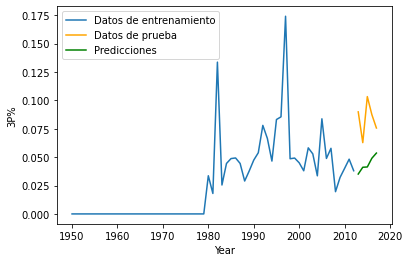

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


tabla_resultado_P['Year'] = pd.to_datetime(tabla_resultado_P['Year'], format='%Y')
tabla_resultado_P.set_index('Year', inplace=True)

# Dividir el conjunto de datos en entrenamiento y prueba
train_data = tabla_resultado_P['3P%'].iloc[:-5]  # Tomar todos menos los últimos 5 años
test_data = tabla_resultado_P['3P%'].iloc[-5:]   # Tomar los últimos 5 años para la evaluación

# Crear y entrenar el modelo Holt
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()

# Realizar predicciones
predictions = result.predict(start=test_data.index[0], end=test_data.index[-1])

# Graficar resultados
plt.plot(train_data.index, train_data, label='Datos de entrenamiento')
plt.plot(test_data.index, test_data, label='Datos de prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Year')
plt.ylabel('3P%')
plt.legend()
plt.show()


In [35]:
# Extrear csv para trabajarlo con Tableau

# Crear un DataFrame con las fechas y las predicciones
predictions_df = pd.DataFrame({'Date': predictions.index, '3P% Predicted': predictions.values})

# Exportar el DataFrame a un archivo CSV
predictions_df.to_csv('predicciones.csv', index=False)

